In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sqlalchemy as db
from sqlalchemy import create_engine
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [2]:
url = 'sqlite:///spotify.db'

In [3]:
engine = create_engine(url)

In [4]:
songs = pd.read_sql_table('song', engine)
songs

,song_id,name,track_number,disc_number,duration_ms,time_signature,year,release_date
0,0,Downtown Life,1,1,268467,4,1988,7/27/1988
1,1,Everything Your Heart Desires,2,1,300467,4,1988,7/27/1988
2,2,I'm In Pieces,3,1,290467,4,1988,7/27/1988
3,3,Missed Opportunity,4,1,287600,4,1988,7/27/1988
4,4,Talking All Night,5,1,274400,4,1988,7/27/1988
...,...,...,...,...,...,...,...,...
70563,70563,The Secret,9,1,279800,4,2009,9/1/2009
70564,70564,Can't Get Used To Losing You,10,1,259427,4,2009,9/1/2009
70565,70565,Baby's Got a Gun,11,1,257000,4,2009,9/1/2009
70566,70566,Whatcha Think About That,12,1,245173,4,2009,9/1/2009


In [5]:
attributes = pd.read_sql_table('attributes', engine)
attributes.head()

,attribute_id,song_id,explicit,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0,0,False,0.660,0.892,-6.545,0,0.0419,0.0971,0.000021,0.3500,0.767,110.089
1,1,1,False,0.706,0.861,-5.774,1,0.0411,0.1570,0.000001,0.2560,0.887,99.992
2,2,2,False,0.381,0.824,-6.400,1,0.0408,0.1190,0.000000,0.0826,0.805,87.064
3,3,3,False,0.765,0.815,-6.931,1,0.0429,0.5230,0.000000,0.0821,0.733,106.063
4,4,4,False,0.745,0.787,-6.328,1,0.0451,0.2190,0.000110,0.0910,0.902,120.925


In [6]:
# Create one df of songs and explicit value 
    # and another df for song and year
explicit_list = attributes[['song_id', 'explicit']]
song_years = songs[['song_id', 'year']]

In [7]:
explicit_songs= pd.merge(explicit_list, song_years, on='song_id', how='outer')
explicit_songs = explicit_songs.groupby(['year', 'explicit']).count()
#explicit_songs = explicit_songs.groupby(['year']).count()
explicit_songs

song_id
year explicit         
1988 False        3875
     True           94
1999 False       23382
     True          831
2009 False       40517
     True         1869

3D model of Explicit vs Non-Explicit songs per year

(0.0, 6.0, 0.0, 25000.0)

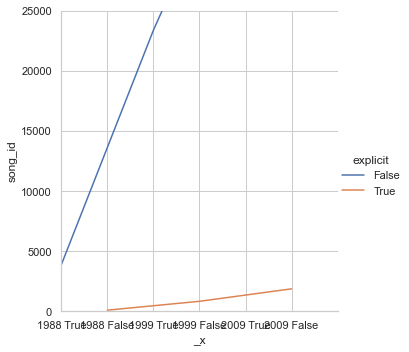

In [8]:
sns.set_theme(style='whitegrid')


sns.relplot(
    data= explicit_songs,
    x=['1988 True', '1988 False', '1999 True', '1999 False', '2009 True', '2009 False'],
    y="song_id",
    hue="explicit",
    kind="line",
)
plt.axis([0, 6,  0, 25000])

In [10]:
attributes = pd.read_sql_table('attributes', engine)
attributes

,attribute_id,song_id,explicit,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0,0,False,0.660,0.8920,-6.545,0,0.0419,0.0971,0.000021,0.3500,0.7670,110.089
1,1,1,False,0.706,0.8610,-5.774,1,0.0411,0.1570,0.000001,0.2560,0.8870,99.992
2,2,2,False,0.381,0.8240,-6.400,1,0.0408,0.1190,0.000000,0.0826,0.8050,87.064
3,3,3,False,0.765,0.8150,-6.931,1,0.0429,0.5230,0.000000,0.0821,0.7330,106.063
4,4,4,False,0.745,0.7870,-6.328,1,0.0451,0.2190,0.000110,0.0910,0.9020,120.925
...,...,...,...,...,...,...,...,...,...,...,...,...,...
70563,70563,70563,False,0.630,0.7080,-9.390,1,0.0279,0.1390,0.000000,0.2090,0.8670,104.994
70564,70564,70564,False,0.673,0.2760,-15.667,1,0.0379,0.6470,0.000002,0.0530,0.8150,180.055
70565,70565,70565,False,0.665,0.3650,-18.173,0,0.0269,0.4430,0.000031,0.0778,0.5280,100.171
70566,70566,70566,False,0.630,0.3630,-18.010,1,0.0355,0.4700,0.000004,0.0520,0.8990,85.673


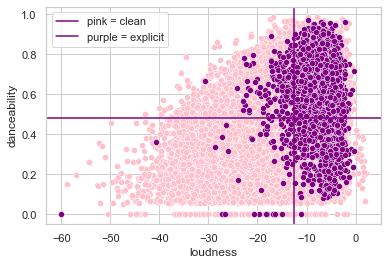

In [11]:
explicit_ = attributes[attributes['explicit']== True]
not_explicit = attributes[attributes['explicit']== False]

explicit_loudness = explicit_['loudness']
not_loud = not_explicit['loudness']
explicit_danceability = explicit_['danceability']
implicit_danceabilty = not_explicit['danceability']


average_loudness = attributes['loudness'].mean()
average_danceability = attributes['danceability'].mean()


plt.axhline(average_danceability, color = 'purple', label = 'average danceability')
plt.axvline(average_loudness, color = 'purple')
#colors = ['red' if point > average_danceability else 'blue' for point in attributes['danceability'] ]
sns.scatterplot(data= not_explicit, x='loudness', y='danceability', color= 'pink')
sns.scatterplot(data= explicit_, x='loudness', y='danceability', color= 'purple')
plt.legend(['pink = clean', 'purple = explicit'])



In [12]:
album_artist = pd.read_sql_table('album_artist', engine)
alb_art_count = album_artist.groupby('artist_id').count()
alb_art_count.reset_index(inplace=True)

<AxesSubplot:xlabel='artist_id', ylabel='album_id'>

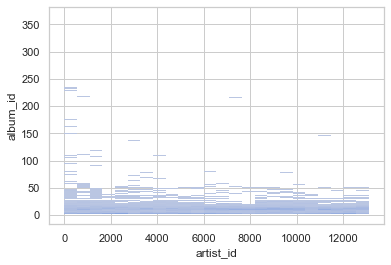

In [13]:
graph = alb_art_count.loc[alb_art_count['album_id'] < 400]
sns.histplot(data=graph, x='artist_id', y='album_id')